In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Object Creation

## 1.1 series

普通方式创建series。series是一个带标签的一维容器，里面可以是各种数据类型。其中有个关键的标签叫做轴标签（`axis`）它可以被看成是索引（**index**），一般创建方法是：
```python
s = pd.Series(data, index=index)
```

`data`可以是：
- python dict
- an ndarray
- 标量值（a scalar value. like 5）

### From ndarray

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    0.614984
b    0.759369
c    0.850357
d   -0.222950
e    1.313277
dtype: float64

In [3]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [4]:
s.values

array([ 0.6149842 ,  0.75936904,  0.85035687, -0.22295007,  1.3132771 ])

In [5]:
s = pd.Series([1, 2, 4, np.nan, 8.2, 9.1])
s

0    1.0
1    2.0
2    4.0
3    NaN
4    8.2
5    9.1
dtype: float64

### From dict

In [6]:
d = {'b': 1, 'a': 2, 'c': 3}
s = pd.Series(d)
s

b    1
a    2
c    3
dtype: int64

In [7]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    3.0
d    NaN
a    2.0
dtype: float64

### From a scalar value

In [8]:
pd.Series(5, index=['b', 'c', 'd', 'a'])

b    5
c    5
d    5
a    5
dtype: int64

### Series is ndarray like

In [9]:
s[0]

1

In [10]:
s[:3]

b    1
a    2
c    3
dtype: int64

In [11]:
s[s > s.median()]

c    3
dtype: int64

In [12]:
s[[2, 0, 1]]

c    3
b    1
a    2
dtype: int64

In [13]:
np.exp(s)

b     2.718282
a     7.389056
c    20.085537
dtype: float64

### Series is dict like

In [14]:
s['a']

2

In [15]:
s['e'] = 7
s

b    1
a    2
c    3
e    7
dtype: int64

In [16]:
'e' in s

True

In [17]:
'f' in s

False

In [18]:
s.e

7

In [19]:
s.get('f', np.nan)

nan

### 向量化的操作和标签对齐

In [20]:
print(s)

b    1
a    2
c    3
e    7
dtype: int64


In [21]:
s + s

b     2
a     4
c     6
e    14
dtype: int64

In [22]:
s * 2

b     2
a     4
c     6
e    14
dtype: int64

In [23]:
np.exp(s)

b       2.718282
a       7.389056
c      20.085537
e    1096.633158
dtype: float64

In [24]:
s[1:]

a    2
c    3
e    7
dtype: int64

In [25]:
s[:-1]

b    1
a    2
c    3
dtype: int64

In [26]:
s[1:] + s[:-1]

a    4.0
b    NaN
c    6.0
e    NaN
dtype: float64

## 1.2 DataFrame

### From dict of Series or dicts

In [27]:
# dict key作为column name index作为index
d = {'one': pd.Series([1, 2, 3], index=['a', 'b', 'c']),
     'two': pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [28]:
pd.DataFrame(d, index=['a', 'b', 'c'])

,one,two
a,1,1
b,2,2
c,3,3


In [29]:
pd.DataFrame(d, columns=['one', 'three'])

,one,three
a,1,NaN
b,2,NaN
c,3,NaN


In [30]:
pd.DataFrame(d, columns=['two', 'three'], index=['d', 'c', 'b'])

,two,three
d,4,NaN
c,3,NaN
b,2,NaN


In [31]:
df.index, df.columns

(Index(['a', 'b', 'c', 'd'], dtype='object'),
 Index(['one', 'two'], dtype='object'))

### From dict of ndarray / lists

In [32]:
# list or ndarray 必须有一样的长度
d = {'one': [4, 3, 2, 1],
     'two': [1, 2, 3, 4]}
df = pd.DataFrame(d)
df

,one,two
0,4,1
1,3,2
2,2,3
3,1,4


### From structured or record array

In [33]:
# 该结构由dtype初始化，A: int32 B: float32 C: string(10)
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 2., 'Hello'), (2, 3., 'World')]

In [34]:
# 有点像将对象插入到table里
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [35]:
pd.DataFrame(data, index=['first', 'second'], columns=['C', 'B', 'A'])

,C,B,A
first,b'Hello',2.0,1
second,b'World',3.0,2


### From a list of dict

In [36]:
# 和上面的情况非常相似，每个dict就像一个对象
d = [{'a': 1, 'b': 2}, {'a': 1, 'b': 2, 'c': 3.}]
pd.DataFrame(d)

,a,b,c
0,1,2,NaN
1,1,2,3.0


### Column selection, addition, deletion

In [37]:
d = {'one': pd.Series([1, 2, 3], index=['a', 'b', 'c']),
     'two': pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [38]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [39]:
# 每个列都是series，执行对向量的操作
df['three'] = df['one'] * df['two']

In [40]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,False


In [41]:
# 删除2种方法

del df['two']
df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [42]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [43]:
df['one_trunc'] = pd.Series([1,2,3], index=['j', 'i', 'k'])
df

,one,flag,foo,one_trunc
a,1.0,False,bar,NaN
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [44]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [45]:
df.insert(1, 'bar', df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


### Assign 方法以及链式调用（Method Chains）

In [46]:
df.query('one > 1').head()

,one,bar,flag,foo,one_trunc
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN


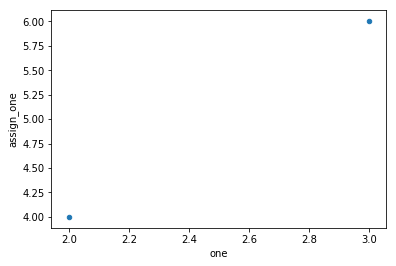

In [47]:
# 返回的是原df的一个copy，并不改变原df
df.query('one > 1').assign(assign_one = lambda x: x.one + x.bar)\
.plot(kind='scatter', x='one', y='assign_one')

In [48]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


### Indexing / Selection

|Operation	|Syntax	|Result
----|---|--|
Select column	|df[col]	|Series
Select row by label	|df.loc[label]|	Series
Select row by integer| location	df.iloc[loc]	|Series
Slice rows	|df[5:10]	|DataFrame
Select rows by boolean vector|	df[bool_vec]	|DataFrame

In [49]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [50]:
print(type(df.loc)) # pandas.core.indexing._LocIndexer
print(df['one'])
print(df.loc['a'])
print(df.iloc[0])

<class 'pandas.core.indexing._LocIndexer'>
a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64
one              1
bar              1
flag         False
foo            bar
one_trunc        1
Name: a, dtype: object
one              1
bar              1
flag         False
foo            bar
one_trunc        1
Name: a, dtype: object


In [51]:
df[pd.Series([True, False, False, False], index=['a', 'b', 'c', 'd'])]

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0


In [52]:
# Select rows by boolean vector 
df[df['one'] > 1]

,one,bar,flag,foo,one_trunc
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
